## Week 10 Assignments#10
##### Author - Ganesh Kale

In [6]:
# import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

#### Assignment 10.1.a

In [7]:
#  create tokenize function 


def tokenize(sentence):
    
    '''
        function takes sentence(s) and return the words or tokens
    
    '''
    
    tokens = []
    
    words = sentence.split()
    
    for word in words:
        
        new_word = ""
           
        for char in word:
            
            if char not in string.punctuation:
              
                new_word = new_word+char
            else:
                continue  
                
        tokens.append(new_word)
    
    return tokens

In [10]:
 # example generate ttokens
    
sentence = '''In this section! I will present two major ones: one-hot encoding of tokens, and token embedding (typically used exclusively for words, and called word embedding).'''

print(tokenize(sentence))

['In', 'this', 'section', 'I', 'will', 'present', 'two', 'major', 'ones', 'onehot', 'encoding', 'of', 'tokens', 'and', 'token', 'embedding', 'typically', 'used', 'exclusively', 'for', 'words', 'and', 'called', 'word', 'embedding']


#### Assignment 10.1.b

In [29]:
# create an `ngram` function that splits tokens into N-grams


def ngram(tokens, n):
    
    
    tups = zip(*[tokens[i:] for i in range(n)])
    
    ngrams = [' '.join(tup) for tup in tups]
    
    return ngrams

In [31]:
 # example - bigram
    
sentence = '''In this section! I will present two major ones: one-hot encoding of tokens, and token embedding (typically used exclusively for words, and called word embedding).'''

tokens = tokenize(sentence)
n = 2 

print(ngram(tokens, n))

['In this', 'this section', 'section I', 'I will', 'will present', 'present two', 'two major', 'major ones', 'ones onehot', 'onehot encoding', 'encoding of', 'of tokens', 'tokens and', 'and token', 'token embedding', 'embedding typically', 'typically used', 'used exclusively', 'exclusively for', 'for words', 'words and', 'and called', 'called word', 'word embedding']


#### Assignment 10.1.c

In [75]:
# Implement an one_hot_encode function

def one_hot_encode(tokens, num_words):
    token_index = {}
    
    for token in tokens:
        
        if token not in token_index:
            token_index[token] = len(token_index)
            
    results = []
       
    for tok in tokens:
        zero_arr = np.zeros(shape=(len(tokens),num_words))
        zero_arr[token_index[tok]] = 1
        results.append(zero_arr)
   
    return results

In [78]:
 # example - one-hot encode
    
sentence = '''In this section! I will present two major ones: one-hot encoding of tokens, and token embedding.'''

tokens = tokenize(sentence)


print(one_hot_encode(tokens,5))

[array([[1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1

### Assignment 10.2

In [84]:
# load the train data

import os


imdb_data_path = '/Users/ganeshkale/work/virtual_envs/DSC650_Big_Data/dsc650/data/external/imdb/aclImdb'
train_data_path = os.path.join(imdb_data_path,'train')

labels = []
texts = []

for label in ['neg','pos']:
    dir_name = os.path.join(train_data_path,label)
    
    for file in os.listdir(dir_name):
        
        if file[-4:]=='.txt':     
            with open(os.path.join(dir_name,file)) as f:
                texts.append(f.read())
            if label =='neg':
                labels.append(0)
            else:
                labels.append(1)  

In [96]:
# tokenize the raw data

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlen = 100
training_samples = 500
validation_samples = 10000
max_words = 10000


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples] 
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [98]:
# train the model without pretrained word embeddings

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

embedding_dim = 100

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [99]:
# complie the model/train model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
16/16 [==============================] - 1s 31ms/step - loss: 0.6911 - acc: 0.5320 - val_loss: 0.6962 - val_acc: 0.5189
Epoch 2/10
16/16 [==============================] - 0s 23ms/step - loss: 0.4728 - acc: 0.9820 - val_loss: 0.7096 - val_acc: 0.5171
Epoch 3/10
16/16 [==============================] - 0s 22ms/step - loss: 0.1835 - acc: 0.9940 - val_loss: 0.7372 - val_acc: 0.5291
Epoch 4/10
16/16 [==============================] - 0s 24ms/step - loss: 0.0511 - acc: 0.9980 - val_loss: 0.7369 - val_acc: 0.5406
Epoch 5/10
16/16 [==============================] - 0s 22ms/step - loss: 0.0166 - acc: 1.0000 - val_loss: 0.7561 - val_acc: 0.5437
Epoch 6/10
16/16 [==============================] - 0s 23ms/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.7496 - val_acc: 0.5536
Epoch 7/10
16/16 [==============================] - 0s 24ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.8038 - val_acc: 0.5509
Epoch 8/10
16/16 [==============================] - 0s 23ms/step - loss: 7.5947e-04

In [109]:
# save the model

model.save('pre_trained_model_seq.h5')

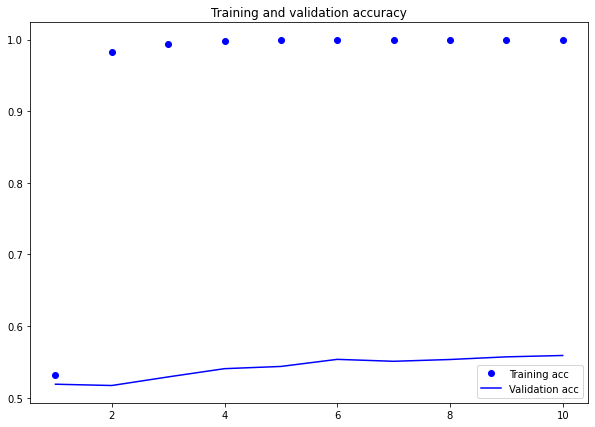

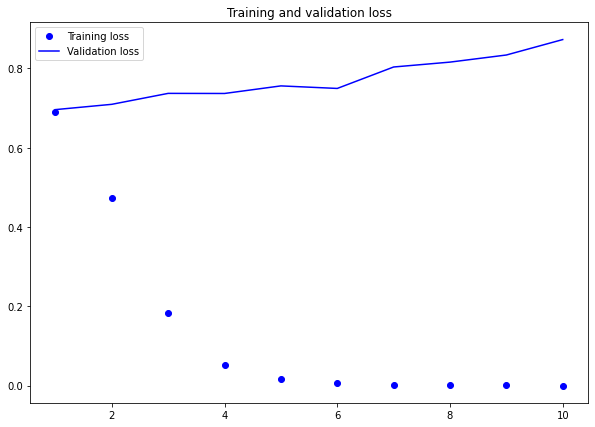

In [104]:
# plot the result

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10,7))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show();

In [105]:
# tokenizing the data of the test set

imdb_data_path = '/Users/ganeshkale/work/virtual_envs/DSC650_Big_Data/dsc650/data/external/imdb/aclImdb'
train_data_path = os.path.join(imdb_data_path,'test')

labels = []
texts = []

for label in ['neg','pos']:
    dir_name = os.path.join(train_data_path,label)
    
    for file in os.listdir(dir_name):
        
        if file[-4:]=='.txt':     
            with open(os.path.join(dir_name,file)) as f:
                texts.append(f.read())
            if label =='neg':
                labels.append(0)
            else:
                labels.append(1)  

In [106]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [112]:
# evaluate the model of test data

model.load_weights('pre_trained_model.h5')
score = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 979us/step - loss: 0.8590 - acc: 0.5633


In [114]:
print(f'Accuracy of the model: {round(score[1]*100,2)}%')

Accuracy of the model: 56.33%


### Assignment 10.3

In [116]:
# LSTM Layer

from keras.layers import LSTM

max_features = 10000
maxlen = 500
batch_size = 32

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [118]:
# compile and train model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
4/4 [==============================] - 2s 155ms/step - loss: 0.6919 - acc: 0.5275 - val_loss: 0.6886 - val_acc: 0.5600
Epoch 2/10
4/4 [==============================] - 0s 38ms/step - loss: 0.6853 - acc: 0.5375 - val_loss: 0.6838 - val_acc: 0.5600
Epoch 3/10
4/4 [==============================] - 0s 37ms/step - loss: 0.6713 - acc: 0.5325 - val_loss: 0.6771 - val_acc: 0.5600
Epoch 4/10
4/4 [==============================] - 0s 39ms/step - loss: 0.6400 - acc: 0.5325 - val_loss: 0.6668 - val_acc: 0.5700
Epoch 5/10
4/4 [==============================] - 0s 39ms/step - loss: 0.5903 - acc: 0.6750 - val_loss: 1.1317 - val_acc: 0.5600
Epoch 6/10
4/4 [==============================] - 0s 39ms/step - loss: 0.6438 - acc: 0.7900 - val_loss: 0.6310 - val_acc: 0.6300
Epoch 7/10
4/4 [==============================] - 0s 39ms/step - loss: 0.4690 - acc: 0.8250 - val_loss: 0.6257 - val_acc: 0.6100
Epoch 8/10
4/4 [==============================] - 0s 41ms/step - loss: 0.3932 - acc: 0.8700 - va

In [122]:
# save the model

model.save('pre_trained_model_lstm.h5')

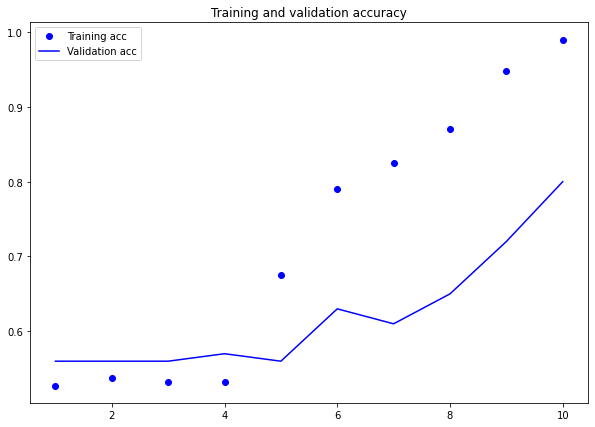

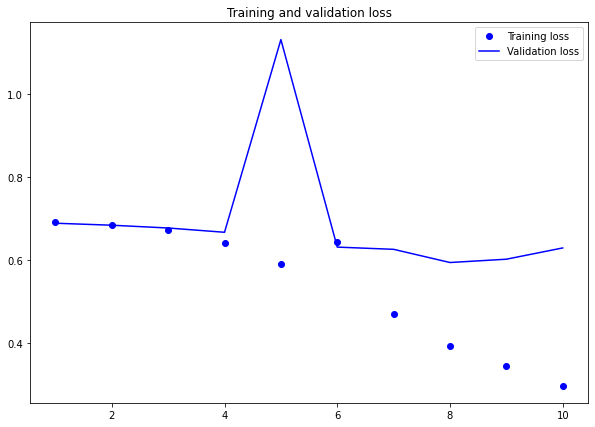

In [119]:
# plot the result

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10,7))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show();

In [123]:
# evaluate the model of test data

model.load_weights('pre_trained_model_lstm.h5')
score = model.evaluate(x_test, y_test)
print(f'Accuracy of the model: {round(score[1]*100,2)}%')

782/782 [==============================] - 17s 22ms/step - loss: 0.7932 - acc: 0.7083
Accuracy of the model: 70.83%


### Assignment 10.4

In [125]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

In [127]:
# model

max_features = 10000
max_len = 500

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

In [128]:
# model summary

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 1)                

In [131]:
# pad seq
from keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [132]:
# compile and train model

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
4/4 [==============================] - 1s 146ms/step - loss: 1.0727 - acc: 0.5325 - val_loss: 0.8820 - val_acc: 0.5600
Epoch 2/10
4/4 [==============================] - 0s 101ms/step - loss: 0.8671 - acc: 0.5325 - val_loss: 0.8145 - val_acc: 0.5600
Epoch 3/10
4/4 [==============================] - 0s 103ms/step - loss: 0.7909 - acc: 0.5325 - val_loss: 0.7827 - val_acc: 0.5600
Epoch 4/10
4/4 [==============================] - 0s 100ms/step - loss: 0.7489 - acc: 0.5325 - val_loss: 0.7591 - val_acc: 0.5600
Epoch 5/10
4/4 [==============================] - 0s 104ms/step - loss: 0.7164 - acc: 0.5325 - val_loss: 0.7441 - val_acc: 0.5600
Epoch 6/10
4/4 [==============================] - 0s 106ms/step - loss: 0.6925 - acc: 0.5325 - val_loss: 0.7334 - val_acc: 0.5600
Epoch 7/10
4/4 [==============================] - 0s 109ms/step - loss: 0.6725 - acc: 0.5325 - val_loss: 0.7178 - val_acc: 0.5600
Epoch 8/10
4/4 [==============================] - 0s 101ms/step - loss: 0.6509 - acc: 0.53

In [133]:
# save the model

model.save('pre_trained_model_1dconvnet.h5')

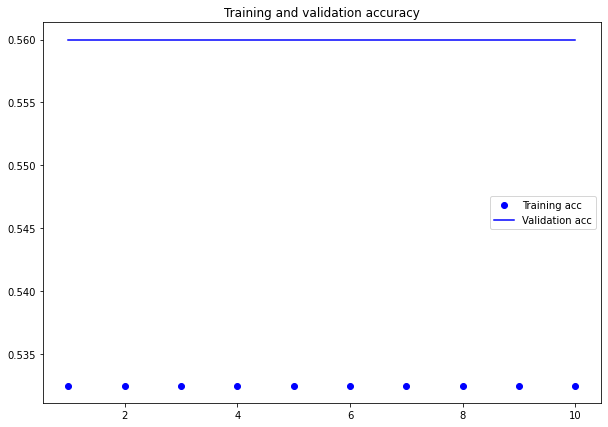

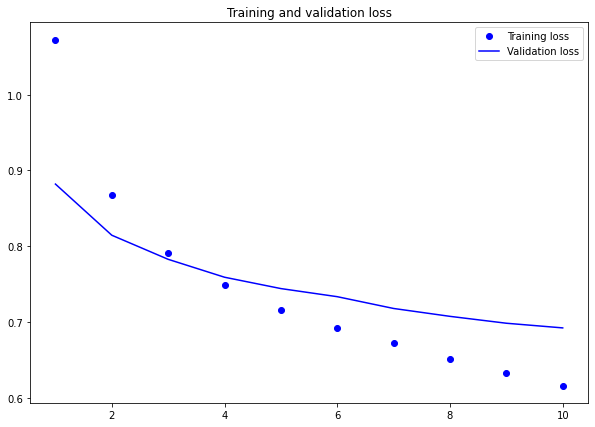

In [134]:
# plot the result

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10,7))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show();

In [136]:
# evaluate the model of test data

model.load_weights('pre_trained_model_1dconvnet.h5')
score = model.evaluate(x_test, y_test)
print(f'Accuracy of the model: {round(score[1]*100,2)}%')

782/782 [==============================] - 5s 7ms/step - loss: 0.7253 - acc: 0.5000
Accuracy of the model: 50.0%


## END